In [38]:
from konlpy.tag import Okt
from gensim.models import Word2Vec, KeyedVectors   
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [39]:
train_data = pd.read_csv('c_minju.txt',names='공')
train_data[:5]

,공
0,제
1,19 대
2,대 통 령 선 거
3,저 책 고 야 지 ᄇ
4,라 를


In [40]:
len(train_data)

7884

In [41]:
stopwords = ['은','는','이','가','을','를','니다','다','.',',','에','의','제','주','내','고','원','조','약','선','나','저','대','호','집','게','당','불','거','더','라','통','책','령','야','으로','하다','한','에게','이다','것','되다','제작','그리고','그래서','그러나','그러므로','촛불','농단','부패','습','정','니','국','년','대다','19','지난','ㅂ','시','인','권','비','민']

In [42]:
okt = Okt()
tokenized_data = []
t = Okt()
tokenized_data = []
for sentence in tqdm(train_data['공']):
    temp_X = okt.morphs(sentence, stem=True)
    temp_X = [word for word in temp_X if not word in stopwords]
    tokenized_data.append(temp_X)

100%|██████████| 7884/7884 [00:13<00:00, 595.58it/s]


최대 길이: 55
평균 길이: 6.650050735667174


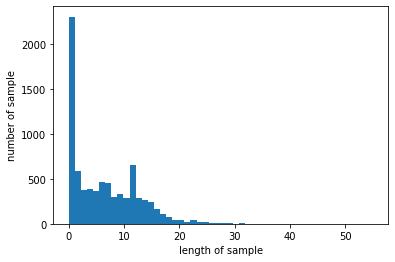

In [43]:
print('최대 길이:',max(len(l) for l in tokenized_data))
print('평균 길이:',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of sample')
plt.ylabel('number of sample')
plt.show()

In [44]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, size=100, window=5, min_count=5, workers=4, sg=0)

In [45]:
model.wv.vectors.shape

(1603, 100)

In [46]:
model.wv.save('minju2_w2v.model')

In [47]:
print(model.wv.most_similar("국정"))

[('근로자', 0.9996778964996338), ('위해', 0.9996674656867981), ('중', 0.999648928642273), ('지', 0.9996413588523865), ('정책', 0.999637246131897), ('6', 0.9996309280395508), ('따르다', 0.9996259808540344), ('부담', 0.9996141195297241), ('경', 0.9996130466461182), ('수준', 0.9996078014373779)]


- 자유: 자유, 평화, 글로벌, 미래, 산업혁명 → 자유민주주의와 미래기술을 통한 경제 발전을 추구함
- 국민: 안보, 평화, 미래, 국민, 외교, 글로벌, 통일, 혁명 →안전한 사회를 만드는 비전을 가지고 있음
- 민주: 남북관계, 더불다, 희망, 안보, 외교, 안전 → 국정농단에 관련된 단어가 많아서 관련 단어는 제외하고 시각화했는데, 제외하기 전에 '촛불'이란 단어도 많이 나옴 전체적으로, 남북관계와 관련되서 안보, 외교 등을 강조함
- 정의: 안전, 여성, 노동, 청년. 건강, 주거, 장애인, 일자리, 청소년, 아동, 중소, 어르신, 소수자, 빈민 → 평등한 사회를 추구함
- 바른: 창업, 복지, 주고, 교육, 미래, 안전하다, 공정하다, 행복하다, 깨끗하다, 농어촌, 시장경제 → 시장경제의 질서를 확립하고, 법 앞의 평등